In [37]:
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
data_path = './bitcoin_filtered.csv'
df = pd.read_csv(data_path)

In [5]:
df

,date,open,close,high,low,btc_volume,usd_volume,volatility,cnt,ret
0,2016-01-01,430.516667,433.820,436.00,427.20,5570.202208,2.411393e+06,0.001202,1440,0.006800
1,2016-01-02,434.870000,433.375,435.99,430.42,4521.763130,1.959375e+06,0.000796,1440,-0.001026
2,2016-01-03,433.200000,431.040,434.09,424.06,5961.158565,2.556935e+06,0.001065,1440,-0.005388
3,2016-01-04,431.540000,434.170,435.86,428.44,7583.504915,3.280781e+06,0.000880,1440,0.007262
4,2016-01-05,433.310000,432.430,435.39,429.50,5350.234219,2.312794e+06,0.000557,1440,-0.004008
...,...,...,...,...,...,...,...,...,...,...
1212,2019-04-27,5154.110000,5168.910,5218.31,5113.00,4147.391780,2.140799e+07,0.000548,1440,0.002661
1213,2019-04-28,5171.510000,5160.980,5213.23,5099.00,4067.481115,2.100555e+07,0.000517,1440,-0.001534
1214,2019-04-29,5152.980000,5149.110,5191.96,5071.58,5842.740260,3.008434e+07,0.000634,1440,-0.002300
1215,2019-04-30,5150.210000,5269.000,5287.40,5127.05,5088.041423,2.651356e+07,0.000594,1440,0.023284


## 1. Momentum

In [6]:
ir_df = pd.read_csv('10y_IR.csv')
ir_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2.197,2.213,2.102,2.123,2.123,0.0
1,2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-05,2.102,2.109,2.037,2.039,2.039,0.0
3,2015-01-06,1.968,1.997,1.889,1.963,1.963,0.0
4,2015-01-07,1.975,2.008,1.938,1.954,1.954,0.0
...,...,...,...,...,...,...,...
1514,2019-12-26,1.912,1.921,1.896,1.905,1.905,0.0
1515,2019-12-27,1.893,1.893,1.870,1.874,1.874,0.0
1516,2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN
1517,2019-12-30,1.923,1.940,1.895,1.895,1.895,0.0


In [7]:
df1 = df.set_index('date').join(ir_df[['Date', 'Adj Close']].set_index('Date'), 
                               how='left', rsuffix='_ir')

In [8]:
df1.fillna(method='bfill', inplace=True)
df1['rf_rate'] = df1['Adj Close']/100
df1.drop('Adj Close', axis=1, inplace=True)

/var/folders/mn/64_gmkvj6j718qjxyr0977d40000gn/T/ipykernel_12419/3280286976.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='bfill', inplace=True)


In [9]:
df1['momentum'] = np.log(1+df1.ret).rolling(12).sum() - np.log(1+df1.rf_rate).rolling(12).sum()
df1['momentum2'] = np.log(1+df1.ret).rolling(12).sum()
df1

,open,close,high,low,btc_volume,usd_volume,volatility,cnt,ret,rf_rate,momentum,momentum2
date,,,,,,,,,,,,
2016-01-01,430.516667,433.820,436.00,427.20,5570.202208,2.411393e+06,0.001202,1440,0.006800,0.02245,NaN,NaN
2016-01-02,434.870000,433.375,435.99,430.42,4521.763130,1.959375e+06,0.000796,1440,-0.001026,0.02245,NaN,NaN
2016-01-03,433.200000,431.040,434.09,424.06,5961.158565,2.556935e+06,0.001065,1440,-0.005388,0.02245,NaN,NaN
2016-01-04,431.540000,434.170,435.86,428.44,7583.504915,3.280781e+06,0.000880,1440,0.007262,0.02245,NaN,NaN
2016-01-05,433.310000,432.430,435.39,429.50,5350.234219,2.312794e+06,0.000557,1440,-0.004008,0.02248,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-27,5154.110000,5168.910,5218.31,5113.00,4147.391780,2.140799e+07,0.000548,1440,0.002661,0.02536,-0.276054,0.027777
2019-04-28,5171.510000,5160.980,5213.23,5099.00,4067.481115,2.100555e+07,0.000517,1440,-0.001534,0.02536,-0.311284,-0.007999
2019-04-29,5152.980000,5149.110,5191.96,5071.58,5842.740260,3.008434e+07,0.000634,1440,-0.002300,0.02536,-0.319037,-0.016298


In [10]:
df1.dropna(inplace=True)
df1

,open,close,high,low,btc_volume,usd_volume,volatility,cnt,ret,rf_rate,momentum,momentum2
date,,,,,,,,,,,,
2016-01-12,448.00,434.850000,448.00,434.35,8009.838089,3.548860e+06,0.000910,1440,-0.029353,0.02102,-0.250657,0.009148
2016-01-13,434.78,432.640000,438.35,424.50,11352.515413,4.880889e+06,0.001117,1440,-0.005082,0.02066,-0.260777,-0.002724
2016-01-14,432.64,429.585714,434.00,427.00,6057.616550,2.608535e+06,0.000702,1440,-0.007060,0.02098,-0.265397,-0.008782
2016-01-15,429.55,360.000000,429.80,360.00,38173.637640,1.510499e+07,0.002260,1440,-0.161983,0.02033,-0.434636,-0.180097
2016-01-16,360.62,386.910000,392.07,352.00,26809.800368,9.974762e+06,0.002068,1440,0.074750,0.02035,-0.367727,-0.115244
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-27,5154.11,5168.910000,5218.31,5113.00,4147.391780,2.140799e+07,0.000548,1440,0.002661,0.02536,-0.276054,0.027777
2019-04-28,5171.51,5160.980000,5213.23,5099.00,4067.481115,2.100555e+07,0.000517,1440,-0.001534,0.02536,-0.311284,-0.007999
2019-04-29,5152.98,5149.110000,5191.96,5071.58,5842.740260,3.008434e+07,0.000634,1440,-0.002300,0.02536,-0.319037,-0.016298


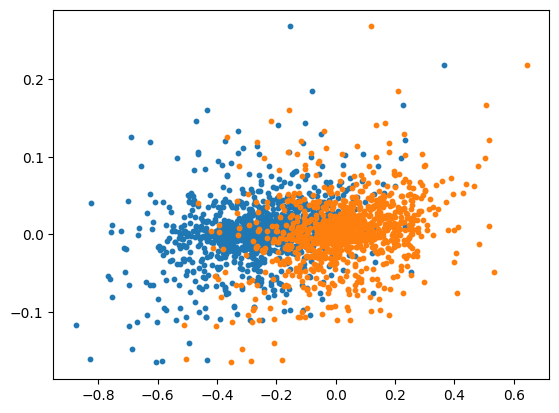

In [11]:
plt.scatter(df1['momentum'], df1['ret'], s=10)
plt.scatter(df1['momentum2'], df1['ret'], s=10)
plt.show()

In [12]:
df1['momentum'].corr(df1['ret'])

0.2872690553982472

In [13]:
df1['momentum2'].corr(df1['ret'])

0.3053805946592819

### Test Vol vs Ret

In [14]:
df1['volatility'].corr(df1['ret'])

0.024229460003144816

In [119]:
df1['volatility'] * np.sqrt(365)

date
2016-01-12    0.017379
2016-01-13    0.021347
2016-01-14    0.013407
2016-01-15    0.043182
2016-01-16    0.039517
                ...   
2019-04-27    0.010465
2019-04-28    0.009884
2019-04-29    0.012106
2019-04-30    0.011355
2019-05-01    0.008977
Name: volatility, Length: 1206, dtype: float64

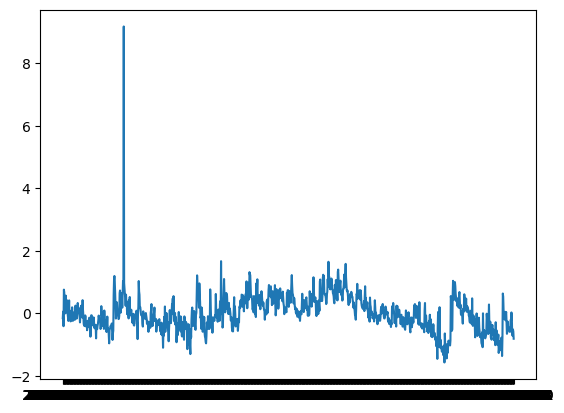

In [124]:
seq1 = np.log(df1['volatility']* np.sqrt(365)) 
plt.plot(seq1 - seq1.mean())

In [166]:
(seq1 - seq1.shift(-1)).corr(df1['ret'])

NameError: name 'seq1' is not defined

In [126]:
seq1.corr(seq1.shift(1))

0.6958518319325279

AttributeError: Rectangle.set() got an unexpected keyword argument 'max'

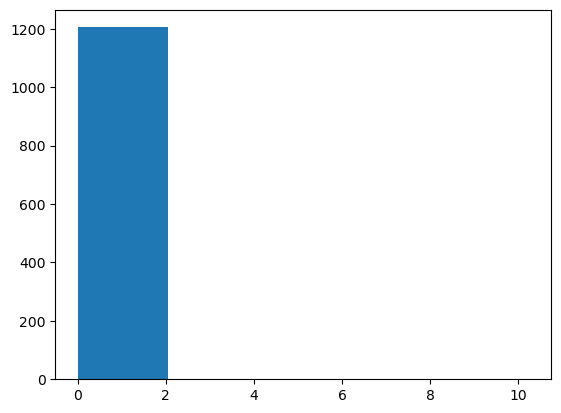

In [134]:
plt.hist(df1['volatility'], bins=5, max=0.1)

## Beta

In [15]:
spy_df = pd.read_csv('SPY.csv')

In [136]:
spy_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,200.490005,201.029999,198.589996,201.020004,175.291794,222353500
1,2016-01-05,201.399994,201.899994,200.050003,201.360001,175.588257,110845800
2,2016-01-06,198.339996,200.059998,197.600006,198.820007,173.373367,152112600
3,2016-01-07,195.330002,197.440002,193.589996,194.050003,169.213852,213436100
4,2016-01-08,195.190002,195.850006,191.580002,191.919998,167.356506,209817200
...,...,...,...,...,...,...,...
1001,2019-12-24,321.470001,321.519989,320.899994,321.230011,302.863373,20270000
1002,2019-12-26,321.649994,322.950012,321.640015,322.940002,304.475616,30911200
1003,2019-12-27,323.739990,323.799988,322.279999,322.859985,304.400208,42528800
1004,2019-12-30,322.950012,323.100006,320.549988,321.079987,302.721954,49729100


In [137]:
df2 = df.set_index('date').join(spy_df[['Date', 'Adj Close']].set_index('Date'), 
                               how='left', rsuffix='_spy')

In [144]:
df2['market_ret'] = df2['Adj Close'].dropna().pct_change()
df2

,open,close,high,low,btc_volume,usd_volume,volatility,cnt,ret,Adj Close,market_ret
date,,,,,,,,,,,
2016-01-01,430.516667,433.820,436.00,427.20,5570.202208,2.411393e+06,0.001202,1440,0.006800,NaN,NaN
2016-01-02,434.870000,433.375,435.99,430.42,4521.763130,1.959375e+06,0.000796,1440,-0.001026,NaN,NaN
2016-01-03,433.200000,431.040,434.09,424.06,5961.158565,2.556935e+06,0.001065,1440,-0.005388,NaN,NaN
2016-01-04,431.540000,434.170,435.86,428.44,7583.504915,3.280781e+06,0.000880,1440,0.007262,175.291794,NaN
2016-01-05,433.310000,432.430,435.39,429.50,5350.234219,2.312794e+06,0.000557,1440,-0.004008,175.588257,0.001691
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-27,5154.110000,5168.910,5218.31,5113.00,4147.391780,2.140799e+07,0.000548,1440,0.002661,NaN,NaN
2019-04-28,5171.510000,5160.980,5213.23,5099.00,4067.481115,2.100555e+07,0.000517,1440,-0.001534,NaN,NaN
2019-04-29,5152.980000,5149.110,5191.96,5071.58,5842.740260,3.008434e+07,0.000634,1440,-0.002300,273.116425,0.001568


In [145]:
df1['market_ret'] = df2['market_ret'][df1.index]

In [146]:
df1

,open,close,high,low,btc_volume,usd_volume,volatility,cnt,ret,rf_rate,momentum,momentum2,market_ret
date,,,,,,,,,,,,,
2016-01-12,448.00,434.850000,448.00,434.35,8009.838089,3.548860e+06,0.000910,1440,-0.029353,0.02102,-0.250657,0.009148,0.008068
2016-01-13,434.78,432.640000,438.35,424.50,11352.515413,4.880889e+06,0.001117,1440,-0.005082,0.02066,-0.260777,-0.002724,-0.024941
2016-01-14,432.64,429.585714,434.00,427.00,6057.616550,2.608535e+06,0.000702,1440,-0.007060,0.02098,-0.265397,-0.008782,0.016417
2016-01-15,429.55,360.000000,429.80,360.00,38173.637640,1.510499e+07,0.002260,1440,-0.161983,0.02033,-0.434636,-0.180097,-0.021466
2016-01-16,360.62,386.910000,392.07,352.00,26809.800368,9.974762e+06,0.002068,1440,0.074750,0.02035,-0.367727,-0.115244,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-27,5154.11,5168.910000,5218.31,5113.00,4147.391780,2.140799e+07,0.000548,1440,0.002661,0.02536,-0.276054,0.027777,NaN
2019-04-28,5171.51,5160.980000,5213.23,5099.00,4067.481115,2.100555e+07,0.000517,1440,-0.001534,0.02536,-0.311284,-0.007999,NaN
2019-04-29,5152.98,5149.110000,5191.96,5071.58,5842.740260,3.008434e+07,0.000634,1440,-0.002300,0.02536,-0.319037,-0.016298,0.001568


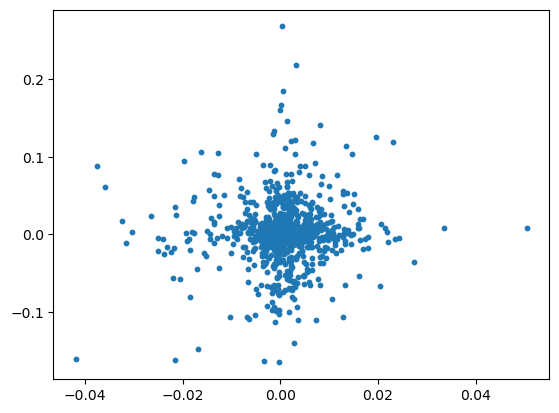

In [147]:
plt.scatter(x=df1['market_ret'], y=df1['ret'], s=10)

In [148]:
df1['market_ret'].corr(df1['ret'])

0.0501262637308577

In [16]:
urth_df = pd.read_csv('URTH.csv')
ioo_df = pd.read_csv('IOO.csv')

In [17]:
urth_df['ret'] = urth_df['Adj Close'].pct_change()
ioo_df['ret'] = ioo_df['Adj Close'].pct_change()

In [152]:
urth_df

,Date,Open,High,Low,Close,Adj Close,Volume,ret
0,2016-01-04,68.019997,68.599998,67.389999,68.599998,59.404301,41400,NaN
1,2016-01-05,68.220001,68.370003,67.730003,68.120003,58.988625,145200,-0.006997
2,2016-01-06,66.900002,67.500000,66.820000,67.330002,58.304531,29200,-0.011597
3,2016-01-07,65.800003,66.730003,65.150002,65.150002,56.416756,1078300,-0.032378
4,2016-01-08,66.150002,66.150002,64.570000,64.809998,56.122326,469500,-0.005219
...,...,...,...,...,...,...,...,...
1001,2019-12-24,98.730003,98.769997,98.250000,98.529999,92.933449,28900,0.000508
1002,2019-12-26,98.769997,98.900002,98.629997,98.900002,93.282410,53000,0.003755
1003,2019-12-27,99.290001,99.309998,98.910004,99.070000,93.442780,47600,0.001719
1004,2019-12-30,99.080002,99.080002,98.330002,98.330002,92.744812,180100,-0.007469


In [153]:
ioo_df

,Date,Open,High,Low,Close,Adj Close,Volume,ret
0,2016-01-04,35.709999,36.029999,35.294998,35.779999,30.507277,305400,NaN
1,2016-01-05,35.730000,35.830002,35.549999,35.755001,30.485964,51600,-0.000699
2,2016-01-06,35.105000,35.294998,34.945000,35.185001,29.999966,241200,-0.015942
3,2016-01-07,34.599998,34.915001,34.345001,34.355000,29.292273,81200,-0.023590
4,2016-01-08,34.505001,34.560001,33.865002,33.915001,28.917114,87000,-0.012807
...,...,...,...,...,...,...,...,...
1001,2019-12-24,53.709999,53.709999,53.590000,53.639999,50.410618,25000,-0.000373
1002,2019-12-26,53.730000,54.049999,53.730000,54.049999,50.795929,262600,0.007643
1003,2019-12-27,54.349998,54.349998,54.099998,54.200001,50.936901,55200,0.002775
1004,2019-12-30,54.160000,54.220001,53.799999,53.799999,50.560982,106400,-0.007380


In [154]:
ioo_df['ret'].corr(urth_df['ret'])

0.9596074450166732

In [18]:
df1['urth_ret'] = urth_df.set_index('Date')['ret']
df1['ioo_ret'] = ioo_df.set_index('Date')['ret']

In [174]:
df1

,open,close,high,low,btc_volume,usd_volume,volatility,cnt,ret,rf_rate,momentum,momentum2,market_ret,urth_ret,ioo_ret
date,,,,,,,,,,,,,,,
2016-01-12,448.00,434.850000,448.00,434.35,8009.838089,3.548860e+06,0.000910,1440,-0.029353,0.02102,-0.250657,0.009148,0.008068,0.005700,0.007199
2016-01-13,434.78,432.640000,438.35,424.50,11352.515413,4.880889e+06,0.001117,1440,-0.005082,0.02066,-0.260777,-0.002724,-0.024941,-0.020987,-0.018670
2016-01-14,432.64,429.585714,434.00,427.00,6057.616550,2.608535e+06,0.000702,1440,-0.007060,0.02098,-0.265397,-0.008782,0.016417,0.017368,0.019025
2016-01-15,429.55,360.000000,429.80,360.00,38173.637640,1.510499e+07,0.002260,1440,-0.161983,0.02033,-0.434636,-0.180097,-0.021466,-0.031990,-0.029901
2016-01-16,360.62,386.910000,392.07,352.00,26809.800368,9.974762e+06,0.002068,1440,0.074750,0.02035,-0.367727,-0.115244,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-27,5154.11,5168.910000,5218.31,5113.00,4147.391780,2.140799e+07,0.000548,1440,0.002661,0.02536,-0.276054,0.027777,NaN,NaN,NaN
2019-04-28,5171.51,5160.980000,5213.23,5099.00,4067.481115,2.100555e+07,0.000517,1440,-0.001534,0.02536,-0.311284,-0.007999,NaN,NaN,NaN
2019-04-29,5152.98,5149.110000,5191.96,5071.58,5842.740260,3.008434e+07,0.000634,1440,-0.002300,0.02536,-0.319037,-0.016298,0.001568,0.001635,0.002639


In [181]:
df1['ret'].corr(df1['ioo_ret'] - df1['rf_rate'])

0.07238165477379808

### Interest Rate

In [185]:
df1['ret'].corr(df1['rf_rate'].diff())

0.00694141218966937

In [186]:
df1['rf_rate'].rolling(30).mean()

date
2016-01-12         NaN
2016-01-13         NaN
2016-01-14         NaN
2016-01-15         NaN
2016-01-16         NaN
                ...   
2019-04-27    0.025314
2019-04-28    0.025355
2019-04-29    0.025368
2019-04-30    0.025372
2019-05-01    0.025377
Name: rf_rate, Length: 1206, dtype: float64

In [191]:
import statsmodels.api as sm

AttributeError: module 'numpy' has no attribute '_no_nep50_warning'

In [197]:
import numpy as np
import statsmodels.api as sm

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

In [209]:
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'sklearn'

## Training

In [34]:
data = df1[['ret', 'momentum2', 'ioo_ret', 'rf_rate']].copy()
data['ioo_ret'].fillna(method='ffill', inplace=True)
data['market_ret'] = data['ioo_ret'].ffill()-data['rf_rate']
data

/var/folders/mn/64_gmkvj6j718qjxyr0977d40000gn/T/ipykernel_12419/983409552.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['ioo_ret'].fillna(method='ffill', inplace=True)


,ret,momentum2,ioo_ret,rf_rate,market_ret
date,,,,,
2016-01-12,-0.029353,0.009148,0.007199,0.02102,-0.013821
2016-01-13,-0.005082,-0.002724,-0.018670,0.02066,-0.039330
2016-01-14,-0.007060,-0.008782,0.019025,0.02098,-0.001955
2016-01-15,-0.161983,-0.180097,-0.029901,0.02033,-0.050231
2016-01-16,0.074750,-0.115244,-0.029901,0.02035,-0.050251
...,...,...,...,...,...
2019-04-27,0.002661,0.027777,0.002442,0.02536,-0.022918
2019-04-28,-0.001534,-0.007999,0.002442,0.02536,-0.022918
2019-04-29,-0.002300,-0.016298,0.002639,0.02536,-0.022721


In [35]:
X = data[['momentum2', 'market_ret']]
Y = data['ret']

In [38]:
X = sm.add_constant(X)

In [40]:
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     62.57
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.41e-26
Time:                        00:39:33   Log-Likelihood:                 2230.3
No. Observations:                1206   AIC:                            -4455.
Df Residuals:                    1203   BIC:                            -4439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0038      0.003      1.306      0.1

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
model = sm.OLS(Y_train, X_train).fit()

In [45]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     46.06
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           7.90e-20
Time:                        00:42:00   Log-Likelihood:                 1788.5
No. Observations:                 964   AIC:                            -3571.
Df Residuals:                     961   BIC:                            -3556.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0031      0.003      0.960      0.3

In [46]:
Y_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
r2

0.11553306255416862

## Include twitter

In [56]:
tw_df = pd.read_csv('twitter.csv')
tw_df

,date,pos,neg,neu
0,2017-06-27,0.316,0.105,0.578
1,2018-09-08,0.089,0.000,0.911
2,2018-09-08,0.070,0.000,0.930
3,2018-09-08,0.080,0.000,0.920
4,2018-09-08,0.059,0.167,0.774
...,...,...,...,...
55024,2018-11-14,0.000,0.081,0.919
55025,2018-11-14,0.000,0.091,0.909
55026,2018-11-14,0.108,0.000,0.892
55027,2018-11-14,0.060,0.000,0.940


In [60]:
tw = tw_df.groupby('date').agg({'pos': 'mean', 'neg': 'mean', 'neu': 'count'})
tw

,pos,neg,neu
date,,,
2017-01-01,0.283000,0.000000,2
2017-01-02,0.165000,0.164250,4
2017-01-03,0.225600,0.000000,5
2017-01-04,0.218000,0.059000,2
2017-01-05,0.212500,0.044500,4
...,...,...,...
2019-04-27,0.144538,0.026067,119
2019-04-28,0.140233,0.041628,86
2019-04-29,0.148932,0.040000,147


In [62]:
tw['sentiment'] = 2 * (tw['pos']/(tw['pos']+tw['neg']) - 0.5)
tw

,pos,neg,neu,sentiment
date,,,,
2017-01-01,0.283000,0.000000,2,1.000000
2017-01-02,0.165000,0.164250,4,0.002278
2017-01-03,0.225600,0.000000,5,1.000000
2017-01-04,0.218000,0.059000,2,0.574007
2017-01-05,0.212500,0.044500,4,0.653696
...,...,...,...,...
2019-04-27,0.144538,0.026067,119,0.694414
2019-04-28,0.140233,0.041628,86,0.542199
2019-04-29,0.148932,0.040000,147,0.576567


In [57]:
tw_df.groupby('date').agg({'pos': 'mean', 'neg': 'mean', 'neu': 'count'})

,pos,neg,neu
date,,,
2017-01-01,0.283000,0.000000,2
2017-01-02,0.165000,0.164250,4
2017-01-03,0.225600,0.000000,5
2017-01-04,0.218000,0.059000,2
2017-01-05,0.212500,0.044500,4
...,...,...,...
2019-04-27,0.144538,0.026067,119
2019-04-28,0.140233,0.041628,86
2019-04-29,0.148932,0.040000,147


In [53]:
X

,const,momentum2,market_ret
date,,,
2016-01-12,1.0,0.009148,-0.013821
2016-01-13,1.0,-0.002724,-0.039330
2016-01-14,1.0,-0.008782,-0.001955
2016-01-15,1.0,-0.180097,-0.050231
2016-01-16,1.0,-0.115244,-0.050251
...,...,...,...
2019-04-27,1.0,0.027777,-0.022918
2019-04-28,1.0,-0.007999,-0.022918
2019-04-29,1.0,-0.016298,-0.022721


In [63]:
tw['sentiment'].corr(df1['ret'])

0.09043769532649659

## Include Reddit

In [155]:
reddit = pd.read_csv('reddit_demo2.csv')
reddit

,_c0,score,controversiality,timestamp,sentiment
0,2810255,-19.0,0,2018-09-19T18:54:07.000-04:00,0.25
1,2810599,1.0,0,2018-09-07T17:10:36.000-04:00,0.25
2,2810822,1.0,0,2018-09-12T16:06:46.000-04:00,0.50
3,2811062,22.0,0,2018-09-27T19:10:36.000-04:00,0.25
4,2855532,1.0,0,2018-12-24T22:55:30.000-05:00,0.25
...,...,...,...,...,...
28964,1297160,-6.0,0,2016-12-07T13:30:39.000-05:00,0.25
28965,1297002,-10.0,0,2016-06-18T00:47:06.000-04:00,0.25
28966,1297209,71.0,0,2016-10-23T01:02:27.000-04:00,0.25
28967,1297164,-4.0,0,2016-12-22T10:51:35.000-05:00,0.50


In [156]:
reddit['date'] = reddit['timestamp'].str[:10]
reddit

,_c0,score,controversiality,timestamp,sentiment,date
0,2810255,-19.0,0,2018-09-19T18:54:07.000-04:00,0.25,2018-09-19
1,2810599,1.0,0,2018-09-07T17:10:36.000-04:00,0.25,2018-09-07
2,2810822,1.0,0,2018-09-12T16:06:46.000-04:00,0.50,2018-09-12
3,2811062,22.0,0,2018-09-27T19:10:36.000-04:00,0.25,2018-09-27
4,2855532,1.0,0,2018-12-24T22:55:30.000-05:00,0.25,2018-12-24
...,...,...,...,...,...,...
28964,1297160,-6.0,0,2016-12-07T13:30:39.000-05:00,0.25,2016-12-07
28965,1297002,-10.0,0,2016-06-18T00:47:06.000-04:00,0.25,2016-06-18
28966,1297209,71.0,0,2016-10-23T01:02:27.000-04:00,0.25,2016-10-23
28967,1297164,-4.0,0,2016-12-22T10:51:35.000-05:00,0.50,2016-12-22


In [157]:
reddit['weighted_sentiment'] = reddit['score'] * reddit['sentiment']
reddit['abs_score'] = reddit['score'].abs()
reddit

,_c0,score,controversiality,timestamp,sentiment,date,weighted_sentiment,abs_score
0,2810255,-19.0,0,2018-09-19T18:54:07.000-04:00,0.25,2018-09-19,-4.75,19.0
1,2810599,1.0,0,2018-09-07T17:10:36.000-04:00,0.25,2018-09-07,0.25,1.0
2,2810822,1.0,0,2018-09-12T16:06:46.000-04:00,0.50,2018-09-12,0.50,1.0
3,2811062,22.0,0,2018-09-27T19:10:36.000-04:00,0.25,2018-09-27,5.50,22.0
4,2855532,1.0,0,2018-12-24T22:55:30.000-05:00,0.25,2018-12-24,0.25,1.0
...,...,...,...,...,...,...,...,...
28964,1297160,-6.0,0,2016-12-07T13:30:39.000-05:00,0.25,2016-12-07,-1.50,6.0
28965,1297002,-10.0,0,2016-06-18T00:47:06.000-04:00,0.25,2016-06-18,-2.50,10.0
28966,1297209,71.0,0,2016-10-23T01:02:27.000-04:00,0.25,2016-10-23,17.75,71.0
28967,1297164,-4.0,0,2016-12-22T10:51:35.000-05:00,0.50,2016-12-22,-2.00,4.0


In [160]:
re = reddit.groupby('date').agg({'weighted_sentiment': 'sum', 'abs_score': 'sum', 'sentiment': 'mean'})
re

,weighted_sentiment,abs_score,sentiment
date,,,
2016-01-01,226.25,1212.0,0.296000
2016-01-02,186.25,1073.0,0.268248
2016-01-03,341.25,1790.0,0.289216
2016-01-04,355.00,1549.0,0.312500
2016-01-05,376.00,1526.0,0.293269
...,...,...,...
2018-12-27,29.75,118.0,0.316667
2018-12-28,22.75,115.0,0.265152
2018-12-29,24.25,106.0,0.321429


In [161]:
re['reaction'] = re['weighted_sentiment'] / re['abs_score']
re['std_reaction'] = 2 * (re['reaction'] - 0.5)
re['std_sentiment'] = 2 * (re['sentiment'] - 0.5)

In [162]:
re

,weighted_sentiment,abs_score,sentiment,reaction,std_reaction,std_sentiment
date,,,,,,
2016-01-01,226.25,1212.0,0.296000,0.186675,-0.626650,-0.408000
2016-01-02,186.25,1073.0,0.268248,0.173579,-0.652842,-0.463504
2016-01-03,341.25,1790.0,0.289216,0.190642,-0.618715,-0.421569
2016-01-04,355.00,1549.0,0.312500,0.229180,-0.541640,-0.375000
2016-01-05,376.00,1526.0,0.293269,0.246396,-0.507208,-0.413462
...,...,...,...,...,...,...
2018-12-27,29.75,118.0,0.316667,0.252119,-0.495763,-0.366667
2018-12-28,22.75,115.0,0.265152,0.197826,-0.604348,-0.469697
2018-12-29,24.25,106.0,0.321429,0.228774,-0.542453,-0.357143


In [164]:
df1['ret'].corr(re['std_reaction'])

-0.053578204297093965

In [165]:
re['std_sentiment'].corr(re['std_reaction'])

0.30882792565259665